In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
df = pd.read_csv('Data_Final_2024.csv')
df.info()

C:\Users\ESB\AppData\Local\Temp\ipykernel_16512\1426206486.py:1: DtypeWarning: Columns (0,1,2,5,8,9,10,12,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data_Final_2024.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587824 entries, 0 to 1587823
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   menuID                  1587824 non-null  object
 1   sales_year              1587824 non-null  object
 2   sales_month             1587824 non-null  object
 3   cityName                1587824 non-null  object
 4   brandName               1587824 non-null  object
 5   branchID                1587824 non-null  object
 6   branchName              1587824 non-null  object
 7   branchCode              1587824 non-null  object
 8   branchCompanyID         1587824 non-null  object
 9   latitude                1568183 non-null  object
 10  longitude               1568183 non-null  object
 11  subdistrictName         1587824 non-null  object
 12  companyID               1587824 non-null  object
 13  companyName             1587824 non-null  object
 14  companyCode       

In [16]:
# Baca dataset
df = pd.read_csv('df_clean.csv')

# Filter baris di mana Category adalah 'Unknown'
qw = df[df['Category'] == 'Unknown']

# Tampilkan unique brandName dari hasil filter tersebut
unique_brands_in_unknown_category = qw['brandName'].unique()

print("BrandName yang memiliki Category = 'Unknown':")
print("=" * 50)
for i, brand in enumerate(sorted(unique_brands_in_unknown_category), 1):
    print(f"{i}. {brand}")

# Tampilkan jumlah masing-masing brand
print("\nJumlah masing-masing brand dalam Category 'Unknown':")
print("=" * 50)
brand_counts = qw['brandName'].value_counts()
for brand, count in brand_counts.items():
    print(f"- {brand}: {count} records")

# Info summary
print(f"\n📊 SUMMARY:")
print(f"Total records dengan Category 'Unknown': {len(qw)}")
print(f"Jumlah unique brandName: {len(unique_brands_in_unknown_category)}")

df.info()

BrandName yang memiliki Category = 'Unknown':

Jumlah masing-masing brand dalam Category 'Unknown':

📊 SUMMARY:
Total records dengan Category 'Unknown': 0
Jumlah unique brandName: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306090 entries, 0 to 306089
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   menuID           306090 non-null  int64  
 1   SalesDate        306090 non-null  object 
 2   cityName         306090 non-null  object 
 3   brandName        306090 non-null  object 
 4   branchID         306090 non-null  int64  
 5   branchName       306090 non-null  object 
 6   branchCode       306090 non-null  object 
 7   branchCompanyID  306090 non-null  int64  
 8   latitude         300812 non-null  float64
 9   longitude        300812 non-null  float64
 10  subdistrictName  306090 non-null  object 
 11  companyID        306090 non-null  int64  
 12  companyName      306090 non-null  object 
 1

In [17]:
# Baca file CSV
df = pd.read_csv('df_clean.csv')

# 1. Dapatkan semua unique values dari kolom "Category"
unique_categories = df['Category'].unique()
print("Unique values dalam kolom Category:")
for category in sorted(unique_categories):
    print(f"- {category}")

# 2. Untuk setiap kategori, cek brandName yang bernilai 'Unknown'
print("\nBrand 'Unknown' dalam setiap kategori:")
for category in sorted(unique_categories):
    unknown_brands = df[(df['Category'] == category) & (df['brandName'] == 'Unknown')]
    count_unknown = len(unknown_brands)
    print(f"- {category}: {count_unknown} entri")
    
    # Tampilkan detail data jika diperlukan
    if count_unknown > 0:
        print(f"  Sample IDs: {list(unknown_brands.index[:5])}")  # Tampilkan 5 ID pertama

# 3. Analisis tambahan: Persentase Unknown per kategori
print("\nPersentase brand 'Unknown' per kategori:")
total_per_category = df['Category'].value_counts()
for category in sorted(unique_categories):
    total = total_per_category[category]
    unknown_count = len(df[(df['Category'] == category) & (df['brandName'] == 'Unknown')])
    percentage = (unknown_count / total) * 100
    print(f"- {category}: {percentage:.2f}% ({unknown_count}/{total})")

Unique values dalam kolom Category:
- Alcoholic Beverages
- Bakery and Pastries
- Chinese Food
- Coffee
- Dessert
- Eastern
- Fast Food
- Food Court
- Fruit
- Healthy Food
- Japanese Food
- Korean Food
- Noodles
- Ricebowl
- Seafood
- Snack
- Tea and Beverages
- Thai Food
- Traditional Food
- Western

Brand 'Unknown' dalam setiap kategori:
- Alcoholic Beverages: 0 entri
- Bakery and Pastries: 0 entri
- Chinese Food: 0 entri
- Coffee: 0 entri
- Dessert: 0 entri
- Eastern: 0 entri
- Fast Food: 0 entri
- Food Court: 0 entri
- Fruit: 0 entri
- Healthy Food: 0 entri
- Japanese Food: 0 entri
- Korean Food: 0 entri
- Noodles: 0 entri
- Ricebowl: 0 entri
- Seafood: 0 entri
- Snack: 0 entri
- Tea and Beverages: 0 entri
- Thai Food: 0 entri
- Traditional Food: 0 entri
- Western: 0 entri

Persentase brand 'Unknown' per kategori:
- Alcoholic Beverages: 0.00% (0/6436)
- Bakery and Pastries: 0.00% (0/27983)
- Chinese Food: 0.00% (0/10306)
- Coffee: 0.00% (0/36997)
- Dessert: 0.00% (0/14521)
- Easter

ANALISIS DISTRIBUSI KATEGORI
Total Kategori Unik: 20
Total Data: 306,090

DISTRIBUSI KATEGORI (Descending Order)
 1. Traditional Food          :   63,348 records ( 20.70%)
 2. Japanese Food             :   54,041 records ( 17.66%)
 3. Coffee                    :   36,997 records ( 12.09%)
 4. Bakery and Pastries       :   27,983 records (  9.14%)
 5. Western                   :   26,460 records (  8.64%)
 6. Dessert                   :   14,521 records (  4.74%)
 7. Healthy Food              :   10,508 records (  3.43%)
 8. Chinese Food              :   10,306 records (  3.37%)
 9. Fast Food                 :   10,078 records (  3.29%)
10. Korean Food               :    8,609 records (  2.81%)
11. Ricebowl                  :    8,104 records (  2.65%)
12. Noodles                   :    7,343 records (  2.40%)
13. Thai Food                 :    7,257 records (  2.37%)
14. Tea and Beverages         :    6,475 records (  2.12%)
15. Alcoholic Beverages       :    6,436 records (  2.10%)
16

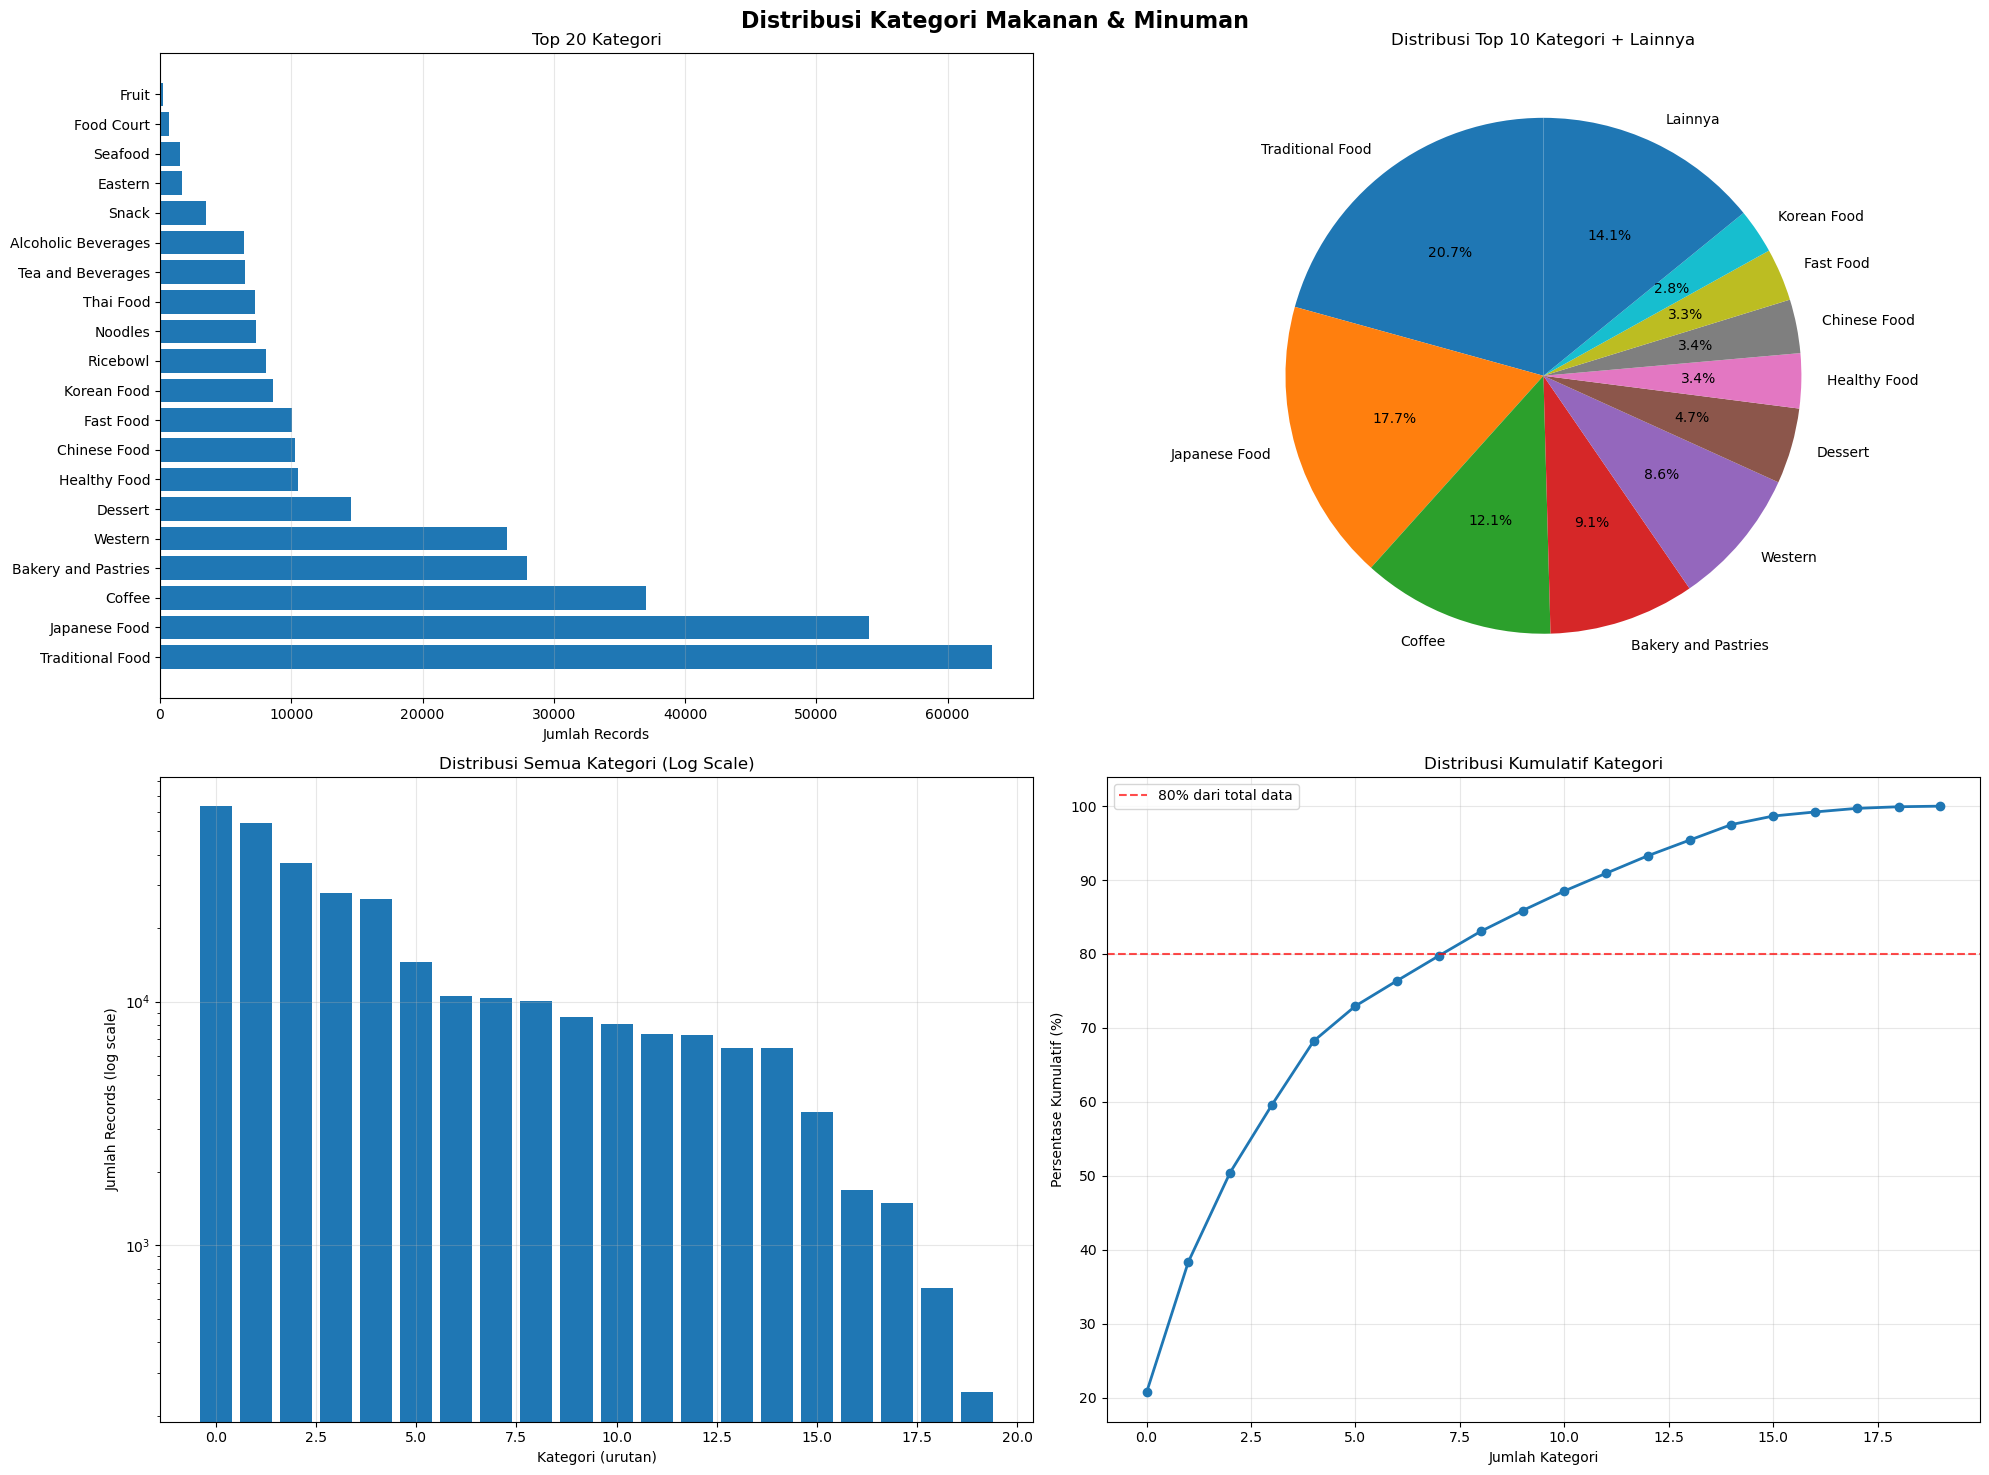


Summary distribusi kategori telah disimpan ke 'category_distribution_summary.csv'

ANALISIS BRAND PER KATEGORI (Top 5 per kategori)

Traditional Food (Total: 63,348 records):
    1. Remboelan (10,402 records)
    2. TPC (6,274 records)
    3. Geprek Gold Chick (3,307 records)
    4. EMADOS SHAWARMA (3,213 records)
    5. RM Padang Payakumbuah (2,300 records)

Japanese Food (Total: 54,041 records):
    1. Ramen Ya! (9,342 records)
    2. MARUGAME UDON (5,498 records)
    3. Pepper Lunch (5,028 records)
    4. KIMUKATSU (4,105 records)
    5. SHORI (2,990 records)

Coffee (Total: 36,997 records):
    1. Djournal (5,851 records)
    2. ARABICA (1,610 records)
    3. Sedjuk Bakmi & Kopi (1,556 records)
    4. Ombe Kofie Pondok Pinang dan Senopati (1,556 records)
    5. ARAH COFFEE (1,031 records)

Bakery and Pastries (Total: 27,983 records):
    1. Paris Baguette (5,705 records)
    2. Bakerzin (3,443 records)
    3. Auntie Anne x Advocado (2,915 records)
    4. Roti Romi Senopati (1,349 

In [18]:
# 1. Baca file hasil kategorisasi
df = pd.read_csv('df_clean.csv')

# 2. Analisis distribusi kategori
print("=" * 60)
print("ANALISIS DISTRIBUSI KATEGORI")
print("=" * 60)

# Hitung value counts untuk kategori
category_distribution = df['Category'].value_counts()

print(f"Total Kategori Unik: {len(category_distribution)}")
print(f"Total Data: {len(df):,}")
print("\n" + "=" * 60)
print("DISTRIBUSI KATEGORI (Descending Order)")
print("=" * 60)

# Tampilkan semua kategori dengan persentase
for i, (category, count) in enumerate(category_distribution.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {category:<25} : {count:>8,} records ({percentage:>6.2f}%)")

# 3. Summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"Kategori terbanyak: {category_distribution.index[0]} ({category_distribution.iloc[0]:,} records)")
print(f"Kategori tersedikit: {category_distribution.index[-1]} ({category_distribution.iloc[-1]:,} records)")
print(f"Rata-rata records per kategori: {category_distribution.mean():.0f} records")
print(f"Median records per kategori: {category_distribution.median():.0f} records")

# 4. Tampilkan top 10 dan bottom 10 kategori
print("\n" + "=" * 60)
print("TOP 10 KATEGORI")
print("=" * 60)
top_10 = category_distribution.head(10)
for i, (category, count) in enumerate(top_10.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {category:<25} : {count:>8,} records ({percentage:>6.2f}%)")

print("\n" + "=" * 60)
print("BOTTOM 10 KATEGORI")
print("=" * 60)
bottom_10 = category_distribution.tail(10)
for i, (category, count) in enumerate(bottom_10.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {category:<25} : {count:>8,} records ({percentage:>6.2f}%)")

# 5. Visualisasi distribusi
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Distribusi Kategori Makanan & Minuman', fontsize=16, fontweight='bold')

# Plot 1: Top 20 kategori (bar chart)
top_20 = category_distribution.head(20)
axes[0, 0].barh(range(len(top_20)), top_20.values)
axes[0, 0].set_yticks(range(len(top_20)))
axes[0, 0].set_yticklabels(top_20.index)
axes[0, 0].set_xlabel('Jumlah Records')
axes[0, 0].set_title('Top 20 Kategori')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Pie chart untuk top 10 kategori
top_10_for_pie = category_distribution.head(10)
other_count = category_distribution[10:].sum()
pie_data = pd.concat([top_10_for_pie, pd.Series({'Lainnya': other_count})])
axes[0, 1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribusi Top 10 Kategori + Lainnya')

# Plot 3: Full distribution (log scale)
axes[1, 0].bar(range(len(category_distribution)), category_distribution.values)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('Kategori (urutan)')
axes[1, 0].set_ylabel('Jumlah Records (log scale)')
axes[1, 0].set_title('Distribusi Semua Kategori (Log Scale)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cumulative distribution
cumulative_pct = (category_distribution.cumsum() / len(df)) * 100
axes[1, 1].plot(range(len(cumulative_pct)), cumulative_pct.values, marker='o', linewidth=2)
axes[1, 1].axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% dari total data')
axes[1, 1].set_xlabel('Jumlah Kategori')
axes[1, 1].set_ylabel('Persentase Kumulatif (%)')
axes[1, 1].set_title('Distribusi Kumulatif Kategori')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Analisis tambahan - kategori dengan hanya 1 record
single_record_categories = category_distribution[category_distribution == 1]
if len(single_record_categories) > 0:
    print("\n" + "=" * 60)
    print(f"KATEGORI DENGAN HANYA 1 RECORD ({len(single_record_categories)} kategori)")
    print("=" * 60)
    for i, (category, count) in enumerate(single_record_categories.items(), 1):
        print(f"{i:2d}. {category}")

# 7. Export results to CSV untuk analisis lebih lanjut
output_summary = pd.DataFrame({
    'Category': category_distribution.index,
    'Count': category_distribution.values,
    'Percentage': (category_distribution.values / len(df)) * 100
})
output_summary.to_csv('category_distribution_summary.csv', index=False)
print(f"\nSummary distribusi kategori telah disimpan ke 'category_distribution_summary.csv'")

# 8. Brand analysis per kategori (opsional)
print("\n" + "=" * 60)
print("ANALISIS BRAND PER KATEGORI (Top 5 per kategori)")
print("=" * 60)

# Untuk setiap kategori, tampilkan top 5 brand
for category in category_distribution.head(10).index:  # Hanya untuk top 10 kategori
    brands_in_category = df[df['Category'] == category]['brandName'].value_counts().head(5)
    print(f"\n{category} (Total: {category_distribution[category]:,} records):")
    for i, (brand, count) in enumerate(brands_in_category.items(), 1):
        print(f"    {i}. {brand} ({count:,} records)")


ANALISIS KHUSUS: KATEGORI COFFEE (BENCHMARK GTV ≥ 3 JUTA)
Total brand dalam kategori Coffee: 143
Brand yang memenuhi benchmark GTV ≥ 3 juta: 140
Persentase brand memenuhi benchmark: 97.9%

----------------------------------------------------------------------
BRAND COFFEE DENGAN GTV ≥ 3 JUTA (Descending Order)
----------------------------------------------------------------------
 1. Jago                      : Rp 102,907,157,000 (Avg: Rp 182,459,498 | 564 transaksi)
 2. Ombe Kofie Pondok Pinang dan Senopati : Rp 29,217,366,101 (Avg: Rp 18,777,228 | 1556 transaksi)
 3. ARABICA                   : Rp 27,716,178,686 (Avg: Rp 17,215,018 | 1610 transaksi)
 4. Djournal                  : Rp 25,933,063,021 (Avg: Rp 4,432,245 | 5851 transaksi)
 5. Sedjuk Bakmi & Kopi       : Rp 12,573,808,813 (Avg: Rp 8,080,854 | 1556 transaksi)
 6. Maiku Cafe                : Rp 11,440,832,425 (Avg: Rp 35,864,678 | 319 transaksi)
 7. LUCKY CAT COFFEE AND KITCHEN : Rp 10,908,542,245 (Avg: Rp 15,025,540 | 726

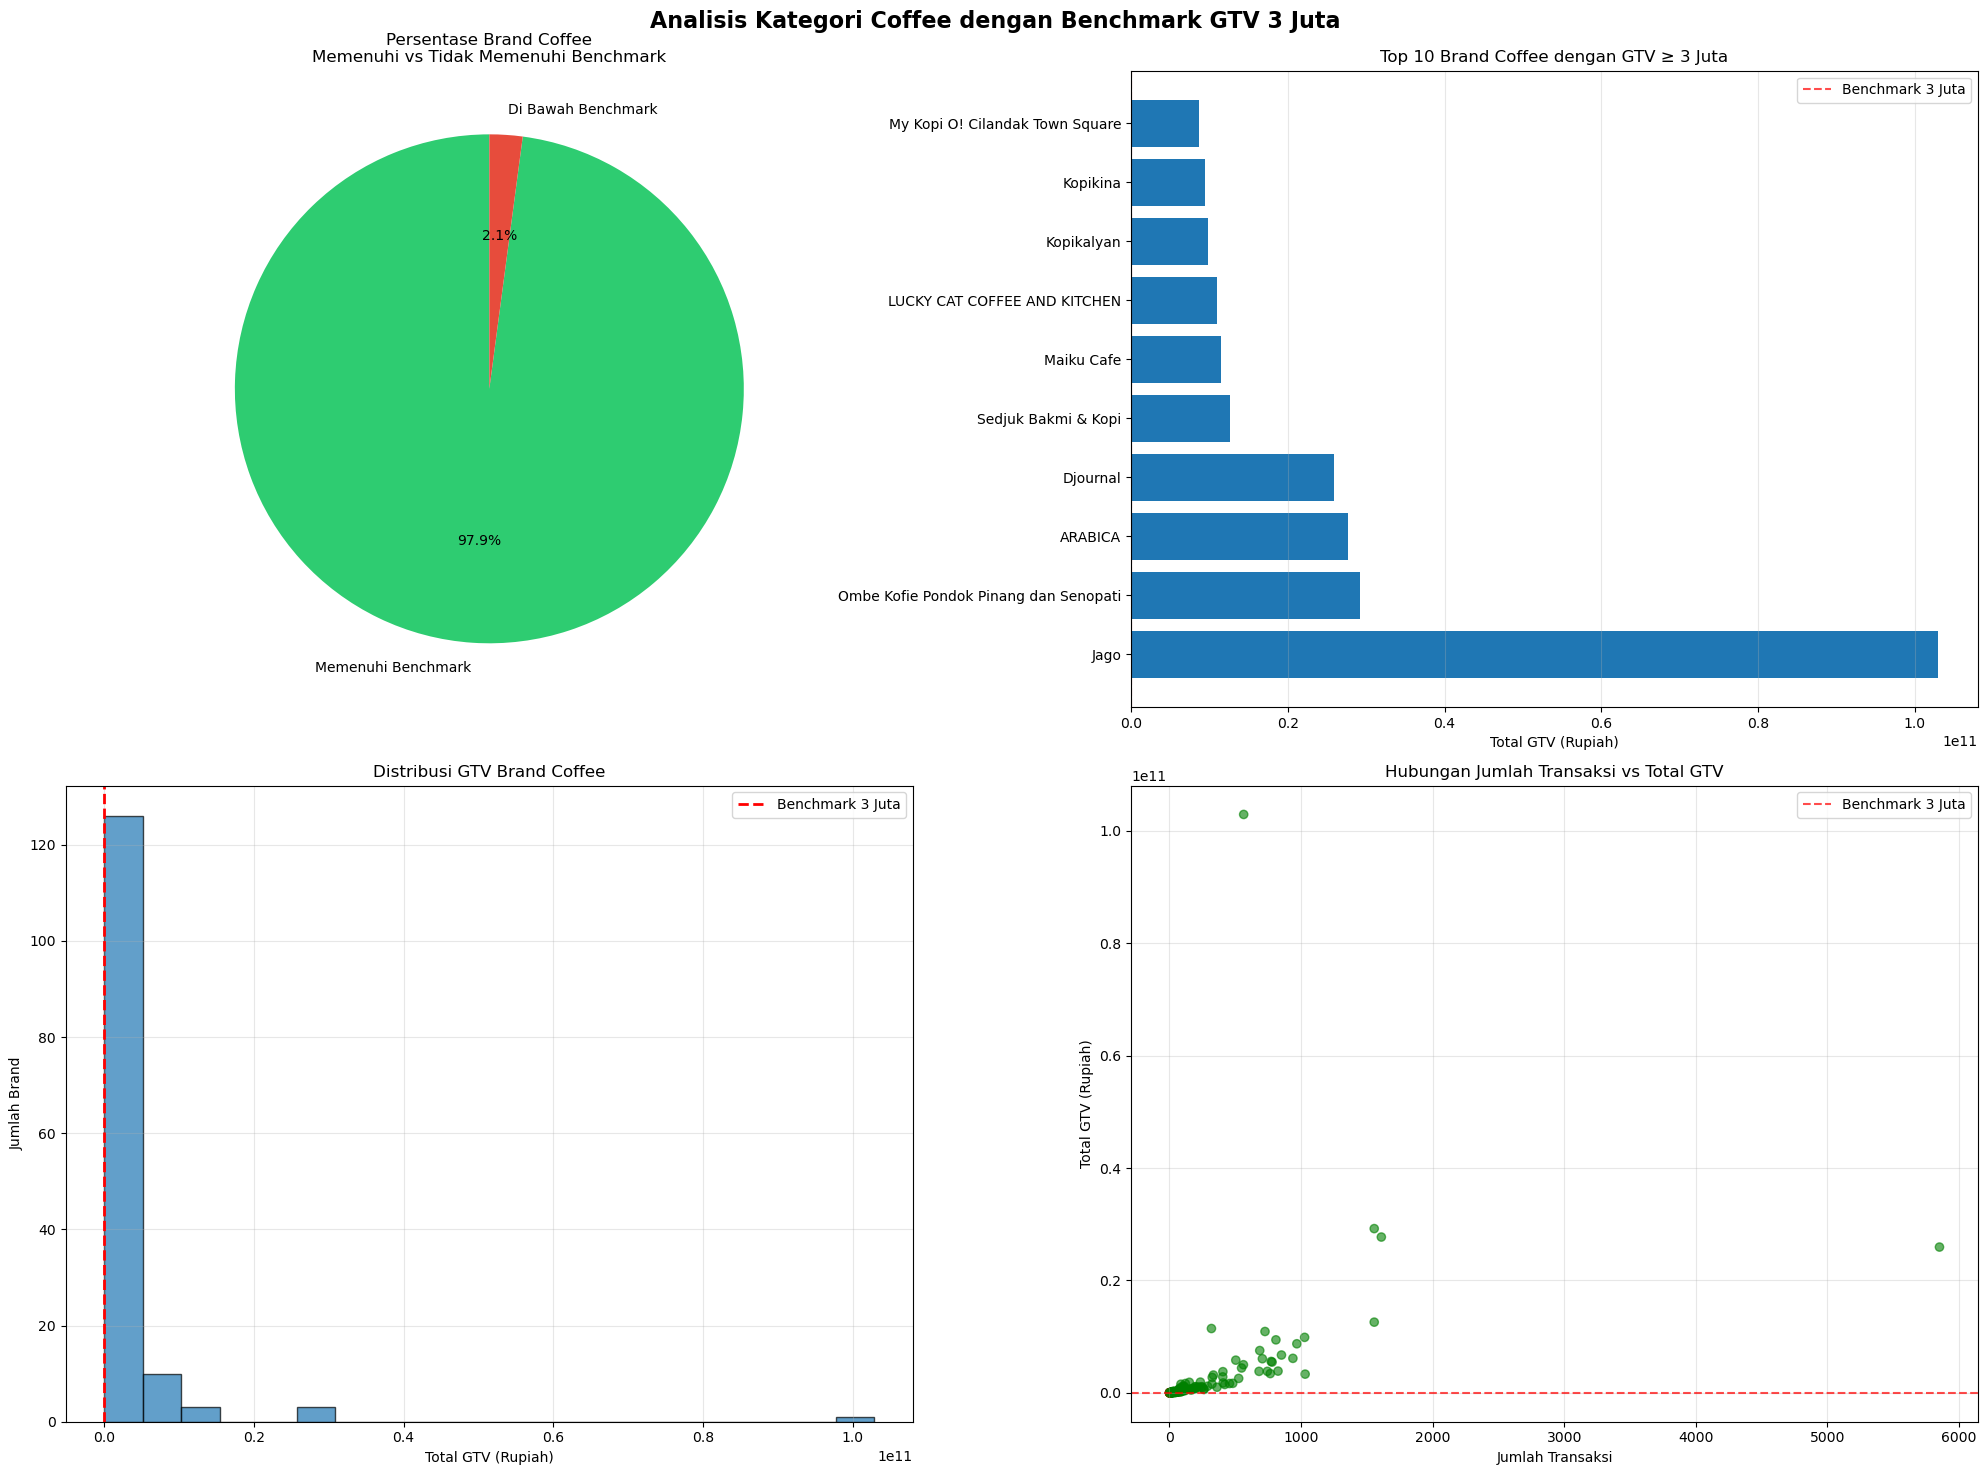


REKOMENDASI STRATEGIS UNTUK KATEGORI COFFEE
1. PERFORMANCE SUMMARY:
   • 140 dari 143 brand (97.9%) telah memenuhi benchmark GTV 3 juta

2. REKOMENDASI UNTUK BRAND DI ATAS BENCHMARK:
   • Pertahankan performance dengan program loyalitas
   • Ekspansi varian produk untuk meningkatkan nilai transaksi
   • Optimasi portfolio product bundling

3. REKOMENDASI UNTUK BRAND DI BAWAH BENCHMARK:
   • Terdapat 3 brand yang perlu ditingkatkan
   • Fokus pada brand dengan GTV mendekati 3 juta terlebih dahulu
   • Implementasi strategi upsell dan cross-sell
   • 2 brand memiliki potensi cepat mencapai benchmark

4. REKOMENDASI UMUM:
   • Rata-rata nilai transaksi: Rp 6,579,495
   • Tingkatkan average transaction value melalui product bundling
   • Optimasi pricing strategy untuk premium products

Hasil analisis coffee telah disimpan ke 'coffee_gtv_analysis.csv'


In [23]:
# =============================================================================
# ANALISIS KHUSUS KATEGORI COFFEE DENGAN BENCHMARK GTV 3 JUTA
# =============================================================================

print("\n" + "=" * 70)
print("ANALISIS KHUSUS: KATEGORI COFFEE (BENCHMARK GTV ≥ 3 JUTA)")
print("=" * 70)

# Filter data untuk kategori coffee
coffee_data = df[df['Category'] == 'Coffee'].copy()

# Periksa apakah ada data coffee
if len(coffee_data) == 0:
    print("Peringatan: Tidak ada data untuk kategori 'Coffee'")
    print("Analisis tidak dapat dilanjutkan.")
    
    # Tampilkan kategori yang ada untuk troubleshooting
    print("\nKategori yang tersedia dalam dataset:")
    unique_categories = df['Category'].value_counts().head(10)
    for category, count in unique_categories.items():
        print(f"  - {category}: {count:,} records")
        
else:
    # Pastikan kolom GTV ada dan dalam format numeric
    coffee_data['gtv_2024'] = pd.to_numeric(coffee_data['gtv_2024'], errors='coerce')

    # Analisis GTV per brand dalam kategori coffee
    coffee_gtv_analysis = coffee_data.groupby('brandName').agg({
        'gtv_2024': ['sum', 'mean', 'count'],
        'Category': 'first'
    }).round(2)

    # Flatten column multi-index
    coffee_gtv_analysis.columns = ['total_gtv', 'avg_gtv', 'transaction_count', 'category']
    coffee_gtv_analysis = coffee_gtv_analysis.reset_index()

    # Filter brand dengan total GTV ≥ 3 juta
    coffee_gtv_benchmark = coffee_gtv_analysis[coffee_gtv_analysis['total_gtv'] >= 3000000].sort_values('total_gtv', ascending=False)

    print(f"Total brand dalam kategori Coffee: {len(coffee_gtv_analysis)}")
    print(f"Brand yang memenuhi benchmark GTV ≥ 3 juta: {len(coffee_gtv_benchmark)}")
    
    # PERBAIKAN: Hindari division by zero dengan conditional check
    if len(coffee_gtv_analysis) > 0:
        percentage = (len(coffee_gtv_benchmark) / len(coffee_gtv_analysis)) * 100
        print(f"Persentase brand memenuhi benchmark: {percentage:.1f}%")
    else:
        print("Persentase brand memenuhi benchmark: 0.0% (tidak ada brand)")

    print("\n" + "-" * 70)
    print("BRAND COFFEE DENGAN GTV ≥ 3 JUTA (Descending Order)")
    print("-" * 70)

    if len(coffee_gtv_benchmark) > 0:
        for i, row in enumerate(coffee_gtv_benchmark.itertuples(), 1):
            print(f"{i:2d}. {row.brandName:<25} : Rp {row.total_gtv:>12,.0f} "
                  f"(Avg: Rp {row.avg_gtv:>8,.0f} | {row.transaction_count:>3} transaksi)")
    else:
        print("Tidak ada brand yang memenuhi benchmark GTV ≥ 3 juta")

    # Analisis lebih detail untuk brand yang memenuhi benchmark
    print("\n" + "-" * 70)
    print("DETAIL PERFORMANCE BRAND YANG MEMENUHI BENCHMARK")
    print("-" * 70)

    if len(coffee_gtv_benchmark) > 0:
        total_gtv_all_coffee = coffee_gtv_analysis['total_gtv'].sum()
        total_transactions_all_coffee = coffee_gtv_analysis['transaction_count'].sum()
        
        gtv_above_benchmark = coffee_gtv_benchmark['total_gtv'].sum()
        transactions_above_benchmark = coffee_gtv_benchmark['transaction_count'].sum()
        
        print(f"Total GTV semua brand coffee: Rp {total_gtv_all_coffee:>,.0f}")
        print(f"Total GTV brand ≥ 3 juta    : Rp {gtv_above_benchmark:>,.0f}")
        print(f"Kontribusi GTV              : {(gtv_above_benchmark/total_gtv_all_coffee)*100:.1f}%")
        print(f"\nTotal transaksi semua brand coffee: {total_transactions_all_coffee:,}")
        print(f"Total transaksi brand ≥ 3 juta    : {transactions_above_benchmark:,}")
        print(f"Kontribusi transaksi              : {(transactions_above_benchmark/total_transactions_all_coffee)*100:.1f}%")
        
        # Statistik tambahan
        print(f"\nRata-rata GTV per brand (≥ 3jt)  : Rp {coffee_gtv_benchmark['total_gtv'].mean():,.0f}")
        print(f"Rata-rata transaksi per brand    : {coffee_gtv_benchmark['transaction_count'].mean():.1f}")
        print(f"Brand dengan GTV tertinggi       : {coffee_gtv_benchmark.iloc[0]['brandName']} "
              f"(Rp {coffee_gtv_benchmark.iloc[0]['total_gtv']:,.0f})")

    # Analisis brand yang TIDAK memenuhi benchmark
    print("\n" + "-" * 70)
    print("BRAND COFFEE DI BAWAH BENCHMARK GTV 3 JUTA")
    print("-" * 70)

    coffee_below_benchmark = coffee_gtv_analysis[coffee_gtv_analysis['total_gtv'] < 3000000].sort_values('total_gtv', ascending=False)

    if len(coffee_below_benchmark) > 0:
        print(f"Total brand di bawah benchmark: {len(coffee_below_benchmark)}")
        
        # Tampilkan top 10 brand terdekat dengan benchmark
        top_10_near_benchmark = coffee_below_benchmark.head(10)
        print("\n10 Brand Terdekat dengan Benchmark:")
        for i, row in enumerate(top_10_near_benchmark.itertuples(), 1):
            gap = 3000000 - row.total_gtv
            print(f"{i:2d}. {row.brandName:<25} : Rp {row.total_gtv:>12,.0f} "
                  f"(Kurang: Rp {gap:>8,.0f} | {row.transaction_count:>2} transaksi)")
        
        # Statistik brand di bawah benchmark
        print(f"\nRata-rata GTV brand di bawah benchmark: Rp {coffee_below_benchmark['total_gtv'].mean():,.0f}")
        print(f"Total GTV yang hilang dari benchmark  : Rp {coffee_below_benchmark['total_gtv'].sum():,.0f}")

    # =============================================================================
    # VISUALISASI KATEGORI COFFEE DENGAN BENCHMARK
    # =============================================================================

    if len(coffee_gtv_analysis) > 0:
        plt.style.use('default')
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle('Analisis Kategori Coffee dengan Benchmark GTV 3 Juta', fontsize=16, fontweight='bold')

        # Plot 1: Perbandingan brand yang memenuhi vs tidak memenuhi benchmark
        benchmark_status = ['Memenuhi Benchmark', 'Di Bawah Benchmark']
        benchmark_counts = [len(coffee_gtv_benchmark), len(coffee_below_benchmark)]
        
        axes[0, 0].pie(benchmark_counts, labels=benchmark_status, autopct='%1.1f%%', 
                       colors=['#2ecc71', '#e74c3c'], startangle=90)
        axes[0, 0].set_title('Persentase Brand Coffee\nMemenuhi vs Tidak Memenuhi Benchmark')

        # Plot 2: Top brand coffee berdasarkan GTV (minimal yang memenuhi benchmark)
        if len(coffee_gtv_benchmark) > 0:
            top_brands = coffee_gtv_benchmark.head(10)
            axes[0, 1].barh(range(len(top_brands)), top_brands['total_gtv'])
            axes[0, 1].set_yticks(range(len(top_brands)))
            axes[0, 1].set_yticklabels(top_brands['brandName'])
            axes[0, 1].set_xlabel('Total GTV (Rupiah)')
            axes[0, 1].set_title('Top 10 Brand Coffee dengan GTV ≥ 3 Juta')
            axes[0, 1].axvline(x=3000000, color='red', linestyle='--', alpha=0.7, label='Benchmark 3 Juta')
            axes[0, 1].legend()
            axes[0, 1].grid(axis='x', alpha=0.3)

        # Plot 3: Distribusi GTV semua brand coffee
        axes[1, 0].hist(coffee_gtv_analysis['total_gtv'], bins=20, edgecolor='black', alpha=0.7)
        axes[1, 0].axvline(x=3000000, color='red', linestyle='--', linewidth=2, label='Benchmark 3 Juta')
        axes[1, 0].set_xlabel('Total GTV (Rupiah)')
        axes[1, 0].set_ylabel('Jumlah Brand')
        axes[1, 0].set_title('Distribusi GTV Brand Coffee')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Plot 4: Relationship antara jumlah transaksi dan total GTV
        colors = ['green' if x >= 3000000 else 'red' for x in coffee_gtv_analysis['total_gtv']]
        axes[1, 1].scatter(coffee_gtv_analysis['transaction_count'], coffee_gtv_analysis['total_gtv'], 
                          c=colors, alpha=0.6)
        axes[1, 1].axhline(y=3000000, color='red', linestyle='--', alpha=0.7, label='Benchmark 3 Juta')
        axes[1, 1].set_xlabel('Jumlah Transaksi')
        axes[1, 1].set_ylabel('Total GTV (Rupiah)')
        axes[1, 1].set_title('Hubungan Jumlah Transaksi vs Total GTV')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    # =============================================================================
    # REKOMENDASI STRATEGIS
    # =============================================================================

    print("\n" + "=" * 70)
    print("REKOMENDASI STRATEGIS UNTUK KATEGORI COFFEE")
    print("=" * 70)

    if len(coffee_gtv_benchmark) > 0:
        # Rekomendasi berdasarkan analisis
        total_coffee_brands = len(coffee_gtv_analysis)
        above_benchmark_pct = (len(coffee_gtv_benchmark) / total_coffee_brands) * 100
        
        print("1. PERFORMANCE SUMMARY:")
        print(f"   • {len(coffee_gtv_benchmark)} dari {total_coffee_brands} brand ({above_benchmark_pct:.1f}%) "
              f"telah memenuhi benchmark GTV 3 juta")
        
        print("\n2. REKOMENDASI UNTUK BRAND DI ATAS BENCHMARK:")
        print("   • Pertahankan performance dengan program loyalitas")
        print("   • Ekspansi varian produk untuk meningkatkan nilai transaksi")
        print("   • Optimasi portfolio product bundling")
        
        if len(coffee_below_benchmark) > 0:
            print("\n3. REKOMENDASI UNTUK BRAND DI BAWAH BENCHMARK:")
            print(f"   • Terdapat {len(coffee_below_benchmark)} brand yang perlu ditingkatkan")
            print("   • Fokus pada brand dengan GTV mendekati 3 juta terlebih dahulu")
            print("   • Implementasi strategi upsell dan cross-sell")
            
            # Identifikasi low-hanging fruits
            near_benchmark = coffee_below_benchmark[coffee_below_benchmark['total_gtv'] >= 2000000]
            if len(near_benchmark) > 0:
                print(f"   • {len(near_benchmark)} brand memiliki potensi cepat mencapai benchmark")
        
        print("\n4. REKOMENDASI UMUM:")
        avg_transaction_value = coffee_gtv_analysis['avg_gtv'].mean()
        print(f"   • Rata-rata nilai transaksi: Rp {avg_transaction_value:,.0f}")
        print("   • Tingkatkan average transaction value melalui product bundling")
        print("   • Optimasi pricing strategy untuk premium products")

    else:
        print("PERHATIAN: Tidak ada brand coffee yang memenuhi benchmark GTV 3 juta")
        print("\nRekomendasi:")
        print("• Lakukan analisis mendalam terhadap faktor penghambat pertumbuhan GTV")
        print("• Review pricing strategy dan product portfolio")
        print("• Implementasi program promosi untuk meningkatkan nilai transaksi")

    # Export hasil analisis coffee
    coffee_analysis_output = coffee_gtv_analysis.sort_values('total_gtv', ascending=False)
    coffee_analysis_output['benchmark_status'] = coffee_analysis_output['total_gtv'].apply(
        lambda x: 'Memenuhi' if x >= 3000000 else 'Tidak Memenuhi'
    )
    coffee_analysis_output.to_csv('coffee_gtv_analysis.csv', index=False)
    print(f"\nHasil analisis coffee telah disimpan ke 'coffee_gtv_analysis.csv'")

📊 ANALISIS DISTRIBUSI PEMASUKAN BULANAN KOPI
📈 Data Points untuk Coffee: 36,997
🏪 Unique Branches: 238

📋 STATISTIK DESKRIPTIF MONTHLY GTV:
Mean (Rata-rata)    : Rp 853,388
Median              : Rp 348,534
Std Dev             : Rp 4,110,812
Minimum             : Rp 32
Maximum             : Rp 145,368,000
Q1 (25%)            : Rp 185,719
Q3 (75%)            : Rp 705,167

🔍 ANALISIS TAMBAHAN:
Total Annual GTV    : Rp 378,873,655,738
Rata-rata AOV       : Rp 40,848
Rata-rata Total Qty : 492

📊 DISTRIBUSI PERSENTIL:
Percentile 5%   : Rp 38,996
Percentile 10%   : Rp 87,949
Percentile 25%   : Rp 185,719
Percentile 50%   : Rp 348,534
Percentile 75%   : Rp 705,167
Percentile 90%   : Rp 1,473,027
Percentile 95%   : Rp 2,365,351
Percentile 99%   : Rp 6,876,560

🎯 SEGMENTASI PERFORMANCE:
Low Performers (<Q1)    : 9,249 branches
Medium Performers (Q1-Q3): 18,499 branches
High Performers (>Q3)   : 9,249 branches

🔮 PERBANDINGAN DENGAN PREDIKSI MODEL:
Predicted Monthly GTV : Rp 19,513,400
Actual Med

C:\Users\ESB\AppData\Local\Temp\ipykernel_16512\205549945.py:135: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ESB\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


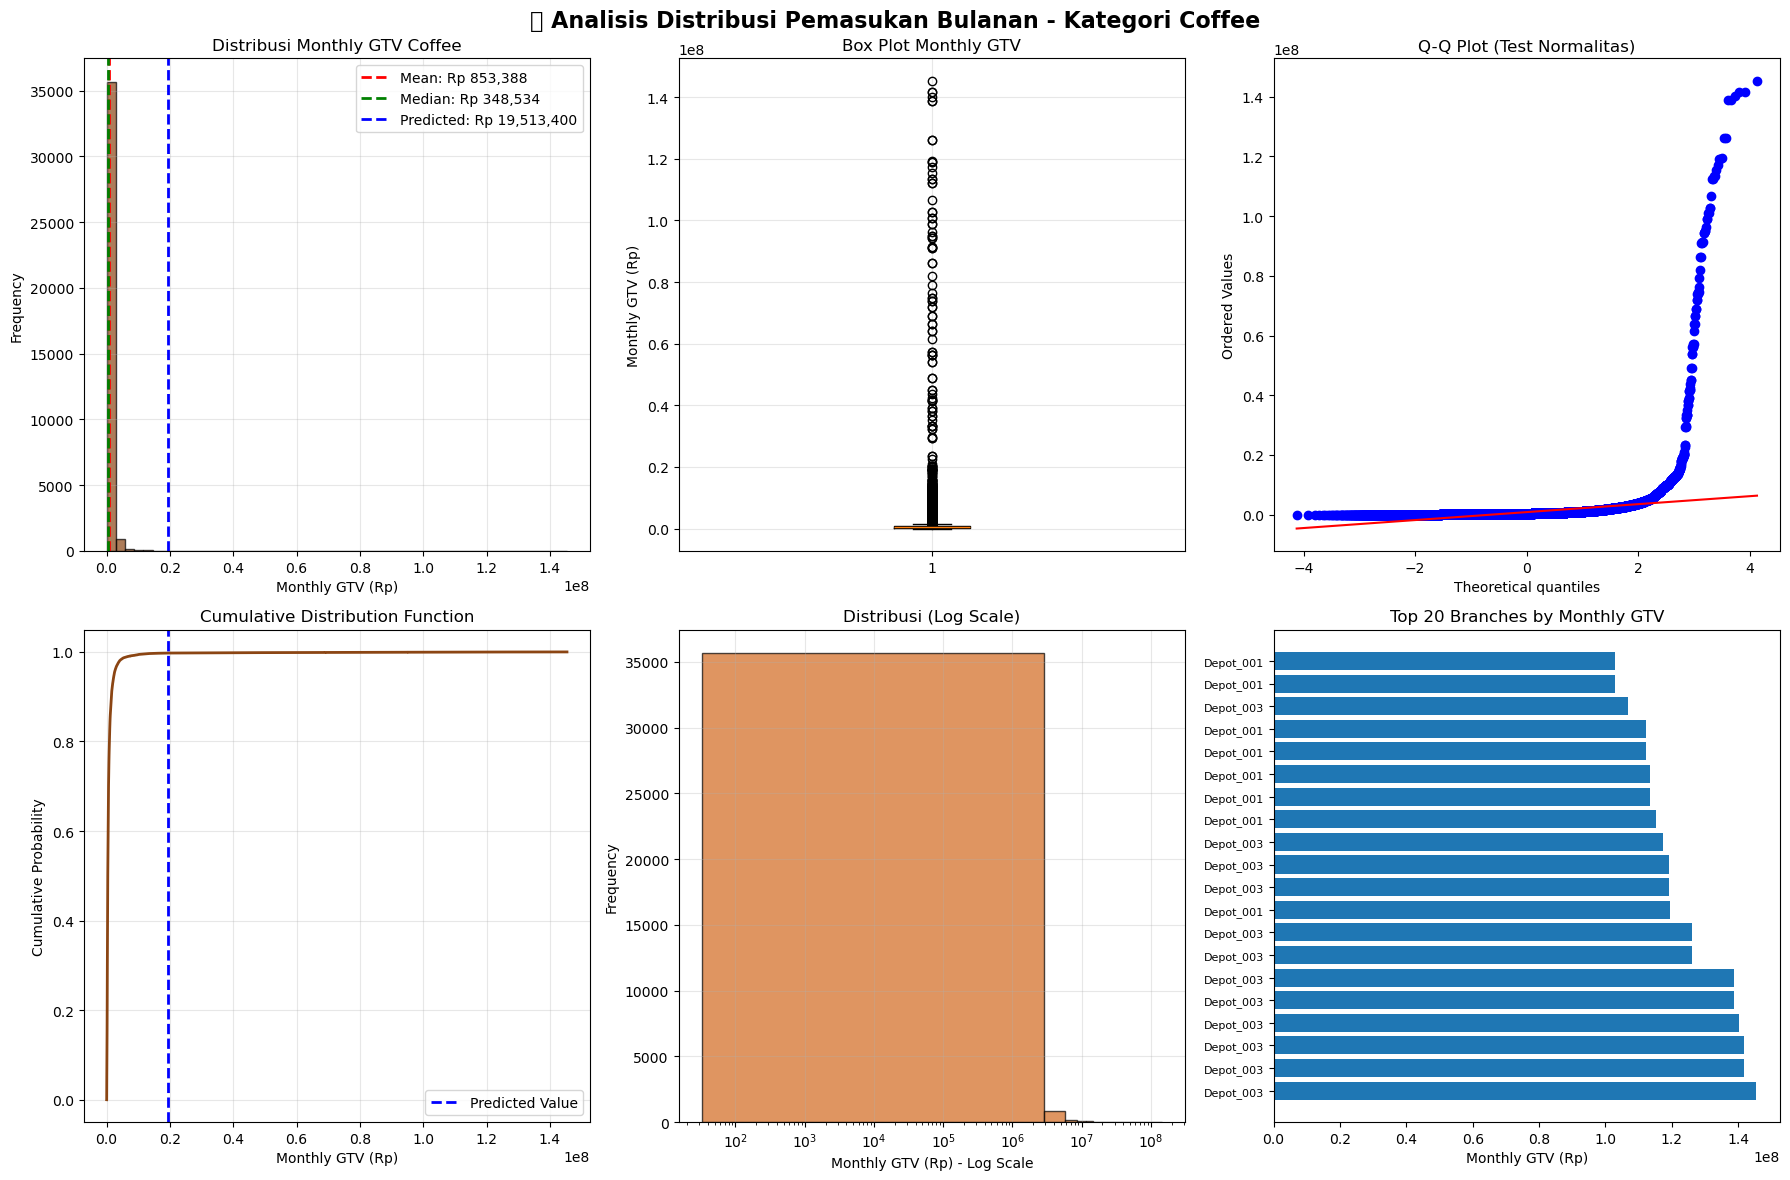


📈 INFORMASI TAMBAHAN:
Skewness: 22.74
Kurtosis: 604.29
→ Distribusi sangat right-skewed (ekor panjang di kanan)
Coefficient of Variation: 481.7%

🏆 TOP 10% PERFORMERS ANALYSIS:
Rata-rata Top 10%    : Rp 4,905,103
Median Top 10%       : Rp 2,365,433


In [ ]:
# def analyze_coffee_training_data():
#     """Analisis mendalam data training untuk kategori Coffee"""
    
#     # Load data clean yang sudah difilter (active_days > 22)
#     print("📊 ANALISIS DISTRIBUSI PEMASUKAN BULANAN KOPI")
#     print("=" * 50)
    
#     df = pd.read_csv('df_clean.csv')
    
#     # Filter data untuk kategori Coffee saja
#     coffee_data = df[df['Category'] == 'Coffee'].copy()
    
#     # Hitung monthly GTV (dari annual GTV)
#     coffee_data['monthly_gtv'] = coffee_data['gtv_2024'] / 12
    
#     print(f"📈 Data Points untuk Coffee: {len(coffee_data):,}")
#     print(f"🏪 Unique Branches: {coffee_data['branchID'].nunique():,}")
    
#     # Statistik deskriptif
#     monthly_stats = coffee_data['monthly_gtv'].describe()
    
#     print("\n📋 STATISTIK DESKRIPTIF MONTHLY GTV:")
#     print("=" * 40)
#     print(f"Mean (Rata-rata)    : Rp {monthly_stats['mean']:,.0f}")
#     print(f"Median              : Rp {monthly_stats['50%']:,.0f}")
#     print(f"Std Dev             : Rp {monthly_stats['std']:,.0f}")
#     print(f"Minimum             : Rp {monthly_stats['min']:,.0f}")
#     print(f"Maximum             : Rp {monthly_stats['max']:,.0f}")
#     print(f"Q1 (25%)            : Rp {monthly_stats['25%']:,.0f}")
#     print(f"Q3 (75%)            : Rp {monthly_stats['75%']:,.0f}")
    
#     # Analisis tambahan
#     print("\n🔍 ANALISIS TAMBAHAN:")
#     print("=" * 40)
#     print(f"Total Annual GTV    : Rp {coffee_data['gtv_2024'].sum():,.0f}")
#     print(f"Rata-rata AOV       : Rp {coffee_data['aov_2024'].mean():,.0f}")
#     print(f"Rata-rata Total Qty : {coffee_data['total_qty'].mean():,.0f}")
    
#     # Persentil analysis
#     percentiles = [5, 10, 25, 50, 75, 90, 95, 99]
#     percentile_values = np.percentile(coffee_data['monthly_gtv'], percentiles)
    
#     print(f"\n📊 DISTRIBUSI PERSENTIL:")
#     print("=" * 40)
#     for p, val in zip(percentiles, percentile_values):
#         print(f"Percentile {p}%   : Rp {val:,.0f}")
    
#     # Segmentasi berdasarkan performa
#     low_performers = coffee_data[coffee_data['monthly_gtv'] < monthly_stats['25%']]
#     medium_performers = coffee_data[(coffee_data['monthly_gtv'] >= monthly_stats['25%']) & 
#                                    (coffee_data['monthly_gtv'] <= monthly_stats['75%'])]
#     high_performers = coffee_data[coffee_data['monthly_gtv'] > monthly_stats['75%']]
    
#     print(f"\n🎯 SEGMENTASI PERFORMANCE:")
#     print("=" * 40)
#     print(f"Low Performers (<Q1)    : {len(low_performers):,} branches")
#     print(f"Medium Performers (Q1-Q3): {len(medium_performers):,} branches") 
#     print(f"High Performers (>Q3)   : {len(high_performers):,} branches")
    
#     # Bandingkan dengan prediksi model
#     predicted_monthly = 19_513_400  # Dari output model
#     actual_median = monthly_stats['50%']
#     actual_mean = monthly_stats['mean']
    
#     print(f"\n🔮 PERBANDINGAN DENGAN PREDIKSI MODEL:")
#     print("=" * 45)
#     print(f"Predicted Monthly GTV : Rp {predicted_monthly:,.0f}")
#     print(f"Actual Median         : Rp {actual_median:,.0f}")
#     print(f"Actual Mean           : Rp {actual_mean:,.0f}")
#     print(f"Selisih vs Median     : {((predicted_monthly - actual_median) / actual_median * 100):+.1f}%")
#     print(f"Selisih vs Mean       : {((predicted_monthly - actual_mean) / actual_mean * 100):+.1f}%")
    
#     # Visualisasi
#     create_coffee_visualizations(coffee_data, monthly_stats, predicted_monthly)
    
#     return coffee_data

# def create_coffee_visualizations(coffee_data, monthly_stats, predicted_value):
#     """Buat visualisasi untuk analisis data Coffee"""
    
#     plt.style.use('default')
#     fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#     fig.suptitle('📊 Analisis Distribusi Pemasukan Bulanan - Kategori Coffee', fontsize=16, fontweight='bold')
    
#     monthly_gtv = coffee_data['monthly_gtv']
    
#     # Plot 1: Histogram distribusi
#     axes[0, 0].hist(monthly_gtv, bins=50, alpha=0.7, color='#8B4513', edgecolor='black')
#     axes[0, 0].axvline(monthly_stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: Rp {monthly_stats["mean"]:,.0f}')
#     axes[0, 0].axvline(monthly_stats['50%'], color='green', linestyle='--', linewidth=2, label=f'Median: Rp {monthly_stats["50%"]:,.0f}')
#     axes[0, 0].axvline(predicted_value, color='blue', linestyle='--', linewidth=2, label=f'Predicted: Rp {predicted_value:,.0f}')
#     axes[0, 0].set_xlabel('Monthly GTV (Rp)')
#     axes[0, 0].set_ylabel('Frequency')
#     axes[0, 0].set_title('Distribusi Monthly GTV Coffee')
#     axes[0, 0].legend()
#     axes[0, 0].grid(True, alpha=0.3)
    
#     # Plot 2: Box plot
#     axes[0, 1].boxplot(monthly_gtv, vert=True)
#     axes[0, 1].set_ylabel('Monthly GTV (Rp)')
#     axes[0, 1].set_title('Box Plot Monthly GTV')
#     axes[0, 1].grid(True, alpha=0.3)
    
#     # Plot 3: QQ plot untuk normalitas
#     stats.probplot(monthly_gtv, dist="norm", plot=axes[0, 2])
#     axes[0, 2].set_title('Q-Q Plot (Test Normalitas)')
    
#     # Plot 4: Cumulative distribution
#     sorted_gtv = np.sort(monthly_gtv)
#     cumulative = np.arange(1, len(sorted_gtv) + 1) / len(sorted_gtv)
#     axes[1, 0].plot(sorted_gtv, cumulative, linewidth=2, color='#8B4513')
#     axes[1, 0].axvline(predicted_value, color='blue', linestyle='--', linewidth=2, label=f'Predicted Value')
#     axes[1, 0].set_xlabel('Monthly GTV (Rp)')
#     axes[1, 0].set_ylabel('Cumulative Probability')
#     axes[1, 0].set_title('Cumulative Distribution Function')
#     axes[1, 0].legend()
#     axes[1, 0].grid(True, alpha=0.3)
    
#     # Plot 5: Log scale histogram
#     axes[1, 1].hist(monthly_gtv, bins=50, alpha=0.7, color='#D2691E', edgecolor='black')
#     axes[1, 1].set_xscale('log')
#     axes[1, 1].set_xlabel('Monthly GTV (Rp) - Log Scale')
#     axes[1, 1].set_ylabel('Frequency')
#     axes[1, 1].set_title('Distribusi (Log Scale)')
#     axes[1, 1].grid(True, alpha=0.3)
    
#     # Plot 6: Top 20 branches
#     top_20 = coffee_data.nlargest(20, 'monthly_gtv')[['branchName', 'monthly_gtv']]
#     axes[1, 2].barh(range(len(top_20)), top_20['monthly_gtv'])
#     axes[1, 2].set_yticks(range(len(top_20)))
#     axes[1, 2].set_yticklabels(top_20['branchName'], fontsize=8)
#     axes[1, 2].set_xlabel('Monthly GTV (Rp)')
#     axes[1, 2].set_title('Top 20 Branches by Monthly GTV')
    
#     plt.tight_layout()
#     plt.show()
    
#     # Additional analysis
#     print(f"\n📈 INFORMASI TAMBAHAN:")
#     print("=" * 30)
    
#     # Skewness and Kurtosis
#     skewness = stats.skew(monthly_gtv)
#     kurtosis = stats.kurtosis(monthly_gtv)
    
#     print(f"Skewness: {skewness:.2f}")
#     print(f"Kurtosis: {kurtosis:.2f}")
    
#     if skewness > 1:
#         print("→ Distribusi sangat right-skewed (ekor panjang di kanan)")
#     elif skewness > 0.5:
#         print("→ Distribusi moderately right-skewed")
#     else:
#         print("→ Distribusi relatif simetris")
    
#     # Coefficient of Variation
#     cv = (monthly_stats['std'] / monthly_stats['mean']) * 100
#     print(f"Coefficient of Variation: {cv:.1f}%")
    
#     # Top performers analysis
#     top_10_percent = coffee_data.nlargest(int(0.1 * len(coffee_data)), 'monthly_gtv')
#     print(f"\n🏆 TOP 10% PERFORMERS ANALYSIS:")
#     print(f"Rata-rata Top 10%    : Rp {top_10_percent['monthly_gtv'].mean():,.0f}")
#     print(f"Median Top 10%       : Rp {top_10_percent['monthly_gtv'].median():,.0f}")

# # Run the analysis
# if __name__ == "__main__":
#     coffee_data = analyze_coffee_training_data()